# A/B тестирование
***

# Описание проекта

Аналитика для крупного интернет-магазина: вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.
Требуется приоритизировать гипотезы, запуститть A/B-тест и проанализировать результаты.

#### Данные для приритезации гипотез

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

#### Данные для анализа А/В теста

Сведения о заказах
-  transactionId — идентификатор заказа;
-  visitorId — идентификатор пользователя, совершившего заказ;
-  date — дата, когда был совершён заказ;
-  revenue — выручка заказа;
-  group — группа A/B-теста, в которую попал заказ.


Сведения о посещениях
-  date — дата;
-  group — группа A/B-теста;
-  visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Оглавление<a class='anchor' id='TOC'></a>

* **[I. Подготовка к анализу](#1)**
    - [1) Импортируем библиотеки, объявим классы HypoPrioritize, ABReporter, MannWhitneyU для анализа](#1_1)
    - [Вывод](#1_conclusion)
<br></br>
* **[II. Приоритизация гипотез](#2)**
    - [1) Применим фреймворки ICE и RICE](#2_1)
    - [2) Проверим гипотезы по методу ICE](#2_2)
    - [2) Проверим гипотезы по методу RICE](#2_3)
    - [Выводы по итогам приоритезации](#2_conclusion)
<br></br> 
* **[III. Анализ A/B-теста](#3)**
    - [1) Исследуем данные](#3_1)
    - [2) Построим графики кумулятивных метрик](#3_2)
    - [3) Исследуем количество заказов на пользователя и стоимости заказов](#3_3)
    - [4) Проведем статистические тесты](#3_4)
    - [Выводы по итогам анализ А/В-теста](#3_conclusion)
<br></br>
* **[Чек-лист](#checklist)**

# I. Подготовка к анализу<a class='anchor' id='1'></a>

## 1) Импортируем библиотеки, объявим классы HypoPrioritize, ABReporter, MannWhitneyU для анализа<a class="anchor" id="1_1"></a>

In [1]:
import pandas as pd

from solver.hypo import HypoPrioritization
from solver.ab_reporter import ABReporter
from solver.stat_tests import MannWhitneyU

[В оглавление](#TOC)

# II. Приоритизация гипотез<a class='anchor' id='2'></a>

## 1) Применим фреймворки ICE и RICE<a class="anchor" id="2_1"></a>

In [2]:
prioritization = HypoPrioritization('datasets/hypothesis.csv')

In [3]:
scores = prioritization.get_priority()
scores

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2


&#9889; **Вывод:** девять гипотез, в отношении каждой посчитали приоритет по методам ICE и RICE.

## 2) Проверим гипотезы по методу ICE<a class="anchor" id="2_2"></a>

In [4]:
(scores.sort_values(by='ICE', ascending=False)
       .style
       .set_properties(**{'text-align': 'left'})
       .set_table_styles([{'selector': 'th',
                           'props': [('text-align','left')]}])
       .background_gradient(cmap="BuGn", subset=['ICE'])
       .format({'ICE': "{:.2f}", 'RICE': "{:.2f}"}))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


&#9889; **Выводы**

По методу ICE наиболее перспективные гипотезы:
- "Запустить акцию, дающую скидку на товар в день рождения" (№ 8, 16.20), 
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" (№ 0, 13.33)
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (№ 7, 11.20)

## 3) Проверим гипотезы по методу RICE<a class="anchor" id="2_3"></a>

In [5]:
(scores.sort_values(by='RICE', ascending=False)
       .style
       .set_properties(**{'text-align': 'left'})
       .set_table_styles([{'selector': 'th',
                           'props': [('text-align','left')]}])
       .background_gradient(cmap="BuGn", subset=['RICE'])
       .format({'ICE': "{:.2f}", 'RICE': "{:.2f}"}))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


&#9889; **Выводы**

По методу RICE наиболее перспективные гипотезы:
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (№ 7, 112.00), 
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" (№ 2, 56.00)
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" (№ 0, 40.00)
- "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" (№ 6, 40.00)

## Выводы по итогам приоритезации<a class="anchor" id="2_conclusion"></a>

1. Охват пользователей (Reach) повлиял на приоритизацию гипотез при применении RICE вместо ICE:
    - две (№ 7, 0) из трех самых прироритетных гипотез по методу ICE вошли в тройку после пересчета по методу RICE - гипотеза о добавлении формы подпсики и добавлении двух каналов; гипотеза о запуске акции, дающей скидку на день рождения переместилась с вершины списка в середину (одинаковое число баллов по RICE и ICE - 16.20),
    - гипотеза № 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"  - получила наибольшую оценку по методу RICE- 112 баллов (ICE - 11.20),
    - гипотеза № 2 - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" получила вдвое меньше баллов по методу RICE, чем гипотеза о форме подписок (56 против 112).
2. Неизвестно как именно сформирована шкала охвата пользователей, поэтому, исходя из представленных данных, до уточнения информации о шкале охвата, с осторожностью можно утверждать, что гипотеза № 7 о добавлении формы подиски является приоритетной, поскольку получила и максимальную оценку по RICE (112), и достаточно высокую по ICE (11.20 из 16.20 - вошла в тройку, на 3.2 балла выше следующей).

[В оглавление](#TOC)

# III. Анализ A/B-теста<a class='anchor' id='3'></a>

## 1) Исследуем данные<a class="anchor" id="3_1"></a>

### - инициализируем класс для анализа

In [6]:
reporter = ABReporter('datasets/visitors.csv', 'datasets/orders.csv')

### - выведем первые пять первых и последних строк таблицы с посетителями, общую информацию, статиcтику

In [7]:
display(reporter.visitors, reporter.visitors.info(), reporter.visitors.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


None

,count,mean,std,min,25%,50%,75%,max
visitors,62.0,607.290323,114.40056,361.0,534.0,624.5,710.5,770.0


### - посчитаем полные дубликаты в данных о посещениях

In [8]:
(reporter.visitors.duplicated() == True).sum()

0

&#9889; **Выводы**

1. В датасете с информацией о посещениях шестьдесят два наблюдения, без пропусков, без проблем с типами данных.
2. Минимальное число посетителей - 361, максимальное - 770. Среднее число посетителей - 607, при медианном значении в 625 посетителей, минимальное число оказало давление на среднее: были провалы в посещении.
3. Полных дубликатов нет.

### - выведем первые пять первых и последних строк таблицы с заказами, общую информацию, статиcтику

In [9]:
display(reporter.orders, reporter.orders.info(), reporter.orders[['revenue']].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


None

,count,mean,std,min,25%,50%,75%,max
revenue,1197.0,8348.005848,39191.131774,50.0,1220.0,2978.0,8290.0,1294500.0


### - посчитаем полные дубликаты в данных о заказах

In [10]:
(reporter.orders.duplicated() == True).sum()

0

&#9889; **Выводы**

1. В датасете с информацией о заказах - 1197 наблюдений, без пропусков и проблем с данными.
2. Минимальная сумма заказа - 50 рублей, средняя - 8 348 рублей, при медианной в 2 978 рублей. Максимальная сумма заказа 1 294 500 рублей. Выбросы оказывают давление на среднее.
3. Полных дубликатов нет.

### - проверим корректно ли разделены группы

Проверим пересечения между группами, сохраним id пользователей в отдельный список

In [11]:
intersections = reporter.get_intersections()
len(intersections)

58

Пятьдесят восемь пользователей попало в обе группы. Посчитаем какой процент от всех уникальных пользователей в данных составляет пересечение.

In [12]:
len(intersections) / reporter.orders['visitorId'].nunique() * 100

5.625606207565471

Пятьдесят восемь пользователей - 5.6% от общего числа уникальных пользователей попали в обе группы. Сохраним данные об этих пользователя в отдельную таблицу, выведем ее.

In [13]:
intersected_users = reporter.orders.query('visitorId in @intersections')
intersected_users

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
20,2904772834,963407295,2019-08-15,300,B
23,4252514150,351125977,2019-08-15,15185,B
24,1162046357,3234906277,2019-08-15,7555,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
1182,2682156369,1668030113,2019-08-14,1290,B
1183,1458356232,963407295,2019-08-14,4940,A
1184,1329499668,2949041841,2019-08-14,10380,B
1189,4082620617,393266494,2019-08-14,31550,B


In [14]:
intersected_users[['revenue']].describe().T

,count,mean,std,min,25%,50%,75%,max
revenue,181.0,8612.900552,14161.550845,50.0,1530.0,3460.0,8439.0,93940.0


В пересечениях 181 наблюдение из 1197 - 15%. Представляется, что это довольно много, чтобы обратить внимание на инструмент разделения пользователей при будущих тестах.

&#9889; **Выводы**

1. В обе группы попали 5.6% (58) от уникальных пользователей (1031), 15% (181) от всех наблюдений о поведении пользователей (1197).
2. Возможно, инструмент разделения пользователей дает систематическую ошибку при разделении, которая не была выявлена при А/А тестировании. Это повод перепроверить способ разделения перед следующим тестом.
3. Поскольку 58 пользователей попали в обе группы - неизвестно, какая именно версия повлияла на их решения. Как следствие, данные об этих пользователях будут влиять на возможную интерпретацию тестов.
4. Принимая во внимание число пользователей, попавших в обе группы, учитвая затруднительность в интерпретации поведения данных пользователей и достаточность данных для проведения анализа - принято решение исключить их из дальнейшего анализа.
5. Как следствие, при расчете кумулятивных метрик, проведении статиститческих тестов, не будут участовавать 181 наблюдение (15%) о 58 (5.6%) уникальных пользователях.

[В оглавление](#TOC)

## 2) Построим графики кумулятивных метрик<a class="anchor" id="3_2"></a>

### - исключим пользователей, попавших в обе группы и посчитаем кумулятивные метрики

In [15]:
cumulated = reporter.grouped_summary(check_intersections=True)

In [16]:
cumulated

,date,group,orders,buyers,revenue,revenue_cm,orders_cm,buyers_cm,visitors,visitors_cm,conversion_cm
0,2019-08-01,A,23,19,142779,142779,23,19,719,719,0.031989
1,2019-08-01,B,17,17,59758,59758,17,17,713,713,0.023843
2,2019-08-02,A,19,18,91602,234381,42,37,619,1338,0.031390
3,2019-08-02,B,23,22,162043,221801,40,39,581,1294,0.030912
4,2019-08-03,A,24,24,112473,346854,66,61,507,1845,0.035772
...,...,...,...,...,...,...,...,...,...,...,...
57,2019-08-29,B,15,15,106100,4746610,510,506,531,17708,0.028801
58,2019-08-30,A,9,8,78180,3311413,460,449,490,18037,0.025503
59,2019-08-30,B,21,21,209223,4955833,531,527,490,18198,0.029179
60,2019-08-31,A,8,8,53243,3364656,468,457,699,18736,0.024979


&#9889; **Выводы**

Получили датасет с изначальными и кумулятивными метриками (столбцы c _cm) на каждую дату, по каждой группе.

### - построим графики

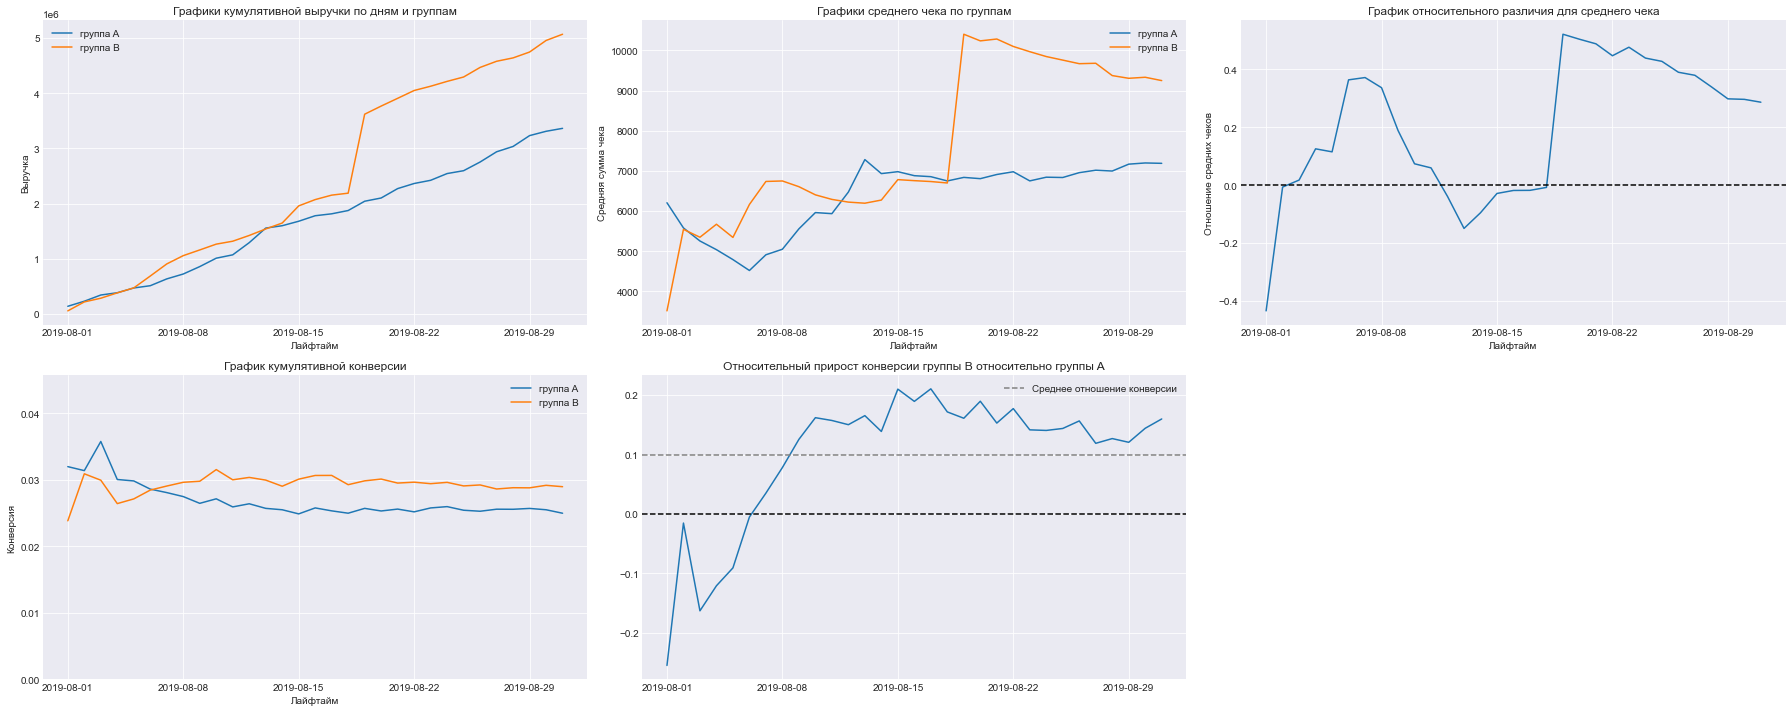

In [17]:
reporter.plot_cumulative_metrics()

&#9889; **Выводы**

1. В середине третей недели кумулятивная выручка и средний чек группы В показал резкий рост, график относительного различия для среднего чека между группами также показывает значительные колебания: вероятно, на метрики оказывают влияние выбросы - крупные заказы.
2. До середины первой недели конвертация обоих групп колебалась, при лучшей конвертации группы А. К концу первой недели теста конверсии групп стабилизировались, после чего конверсия группы В показала заметный рост и на протяжении теста превышала конверсию группы А.
3. График  прироста конверсии группы В относительно группа А также демонстирирует лидерство группы В по конверсии: с конца с первой недели метрика растет, к началу второй недели взрывной рост прекратился и, несмотря на колебания, к концу теста стабилизировалась c приростом в районе 10% относительно группы А.


[В оглавление](#TOC)

## 3) Исследуем количество заказов на пользователя и стоимости заказов<a class="anchor" id="3_3"></a>

### - количество заказов на пользователя

Сформируем таблицу для анализа, выведем результат

In [18]:
orders_by_users = reporter.orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
orders_by_users.columns = ['visitor_id', 'orders']
orders_by_users.sort_values(by='orders', ascending=False)

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
...,...,...
331,1438226485,1
332,1452540367,1
333,1455323168,1
334,1455861274,1


Минимальное число заказов, ожидаемо, 1, максимальное количество заказов - 3. Посмтроим графики.

### - визуализируем количество заказов на пользователя

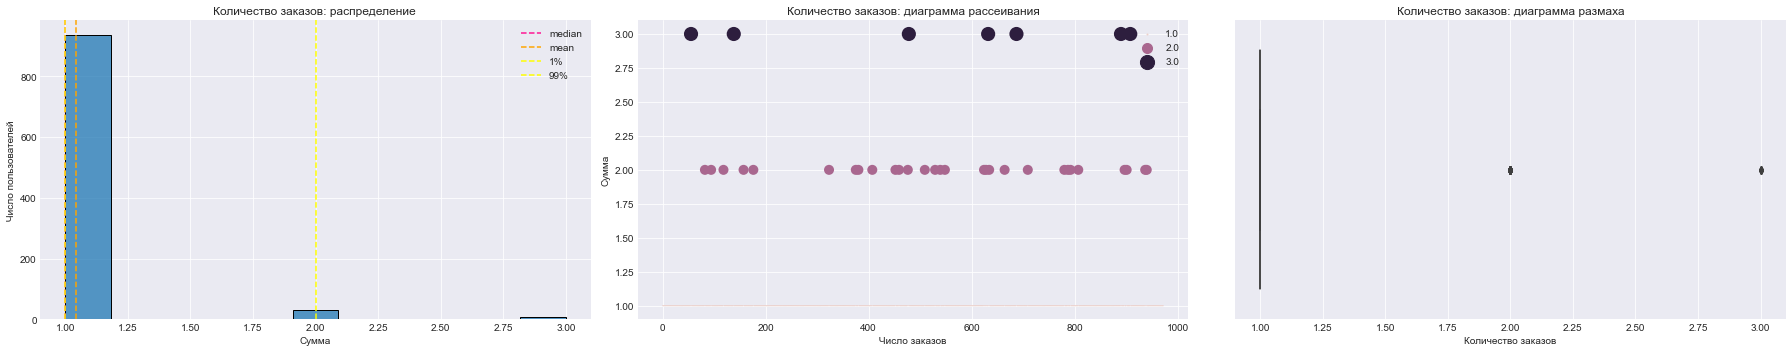

In [19]:
reporter.plotter(orders_by_users, 'orders', 'Количество заказов')

Принимая во внимание, как разнесены среднее и медиана на гистограмме - выбросы оказывают влияние. Девяносто девять процентов пользоватлей заказало от 1 до 2 раз. Это же подтверждает и диаграмма рассеивания - несколько крупных точек доминируют над графиком - и диаграмма размаха - ящик вытянулся в линию. Визуально - выбросов не так много. Проверим числовые значения.

### - получим базовую статистику о количестве заказов на пользователя

In [20]:
orders_by_users[['orders']].describe(percentiles=[.25, .5, .75, .95, .99]).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
orders,973.0,1.044193,0.23809,1.0,1.0,1.0,1.0,1.0,2.0,3.0


Всего один процент пользователей заказывают более двух раз (99-й перцентиль).

&#9889; **Выводы**

1. В заказах есть выбросы, которые влияют на среднее.
2. Минимальное число заказов - 1 , максимальное число заказов - 3.
3. Принимая во внимание имеющиеся данные - разумно выбрать 1 заказ на одного пользователя за верхню границу числа заказов.

[В оглавление](#TOC)

### - визуализируем стоимости заказов

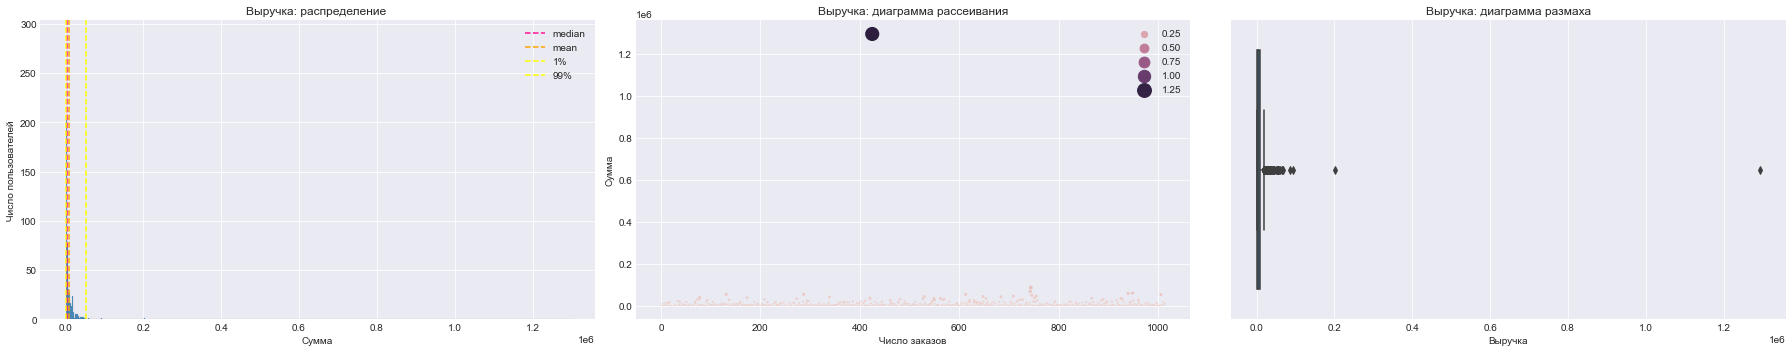

In [21]:
reporter.plotter(reporter.orders, 'revenue', 'Выручка')

В данных о выручке есть сверхдорогой заказ, который хорошо виден на диаграмме рассеивания и диаграмме размаха. Выброс оказывает сильное влияние на среднее. В целом, визуально выбросов немного. Проверим числовые значения.

### - получим базовую статистику о стоиомости заказов

In [22]:
reporter.orders[['revenue']].describe(percentiles=[.25, .5, .75, .95, .99]).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
revenue,1016.0,8300.814961,42121.991672,50.0,1190.0,2955.0,8134.25,26785.0,53904.0,1294500.0


Почти все пользователи уложились в диапазон стоимости заказов от 50 до 53 904 рубля, со средним - 8 300 рублей. Девяносто пять процентов всех пользователей уложились в диапазон от 50 до 26 785 рублей (95-й перцентиль). Один процент заказал на сумму свыше 53 904 рублей (99-й перцентиль), кто-то заказал на 1 294 500 рублей. Избавимся от заказов дороже 26 785 (95-й перцентиль) и снова построим графики.

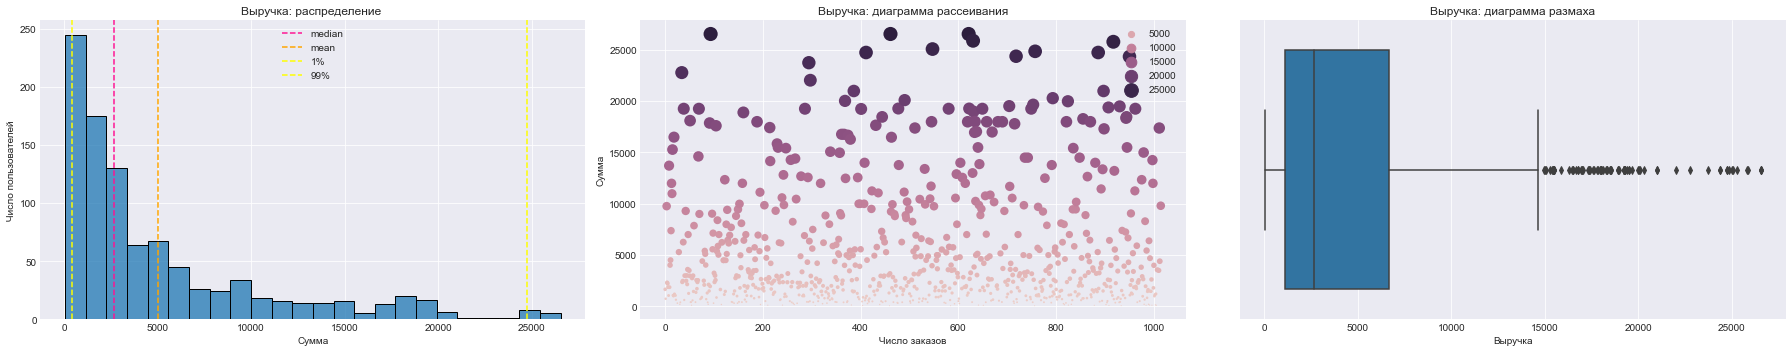

In [23]:
reporter.plotter(reporter.orders.query('revenue < 26786'), 'revenue', 'Выручка')

Среднее и медиана все еще заметно разнесены, но диаграмма рассеивания и размаха показывают куда более равномерное распределение стоимости заказов. Учитывая, что данных не слишком много - дальнейшее сокращение выборки окажет негативное влияние на возможность сделать вывод.

&#9889; **Выводы**

1. В выручке есть выбросы, которые влияют на среднее. Выбросов немного.
2. Минимальная сумма заказа - 50 рублей , максимальная 1 294 500 рублей.
3. Принимая во внимание имеющиеся данные - разумно выбрать 26 785 рублей (95-й перцентиль) за верхнюю границу стоимости заказа.

[В оглавление](#TOC)

## 4) Проведем статистические тесты<a class="anchor" id="3_4"></a>

1. Тест будет проведен по полным и сокращенным данным (без выбросов).
<br></br>    
2. Перед проведением тестов из полных данных исключены выбросы:
     - из выборок о заказах верхняя граница установлена на 95-ом перцентиле (2 заказа), 
     - из выборок о выручке верхняя граница установлена на 95-ом перцентиле (28 000 рублей).
<br></br>        
3. К полученным выборкам будет применен статистический критерий Манна-Уитни.
<br></br>    
4. Для полных и сокращенных данных конверсии проверим гипотезу "Конверсии группы А и В одинаковые":
     - нулевую гипотезу, которую проверяет тест, сформулируем так: "В конверсии между группами нет различий",
     - альтернативную гипотезу, соответственно, сформулируем так: "В конверсии между группами есть различия",
     - примем уровень значимости в 5%.
<br></br>     
4. Для полных и сокращенных данных среднего чека проверим гипотезу "Средние чеки группы А и В одинаковые":
     - нулевую гипотезу, которую проверяет тест, сформулируем так: "Отличий в среднем чеке между группами нет",
     - альтернативную гипотезу, соответственно, сформулируем так: "Отличия в среднем чеке между группами есть",
     - примем уровень значимости в 5%.     

In [24]:
tests_result = MannWhitneyU(reporter.visitors,
                            reporter.orders,
                            cumulated, orders_limit=1,
                            rev_limit=26785).mannwhitneyu()
(tests_result.style
             .set_properties(**{'text-align': 'left'})
             .set_table_styles([{'selector': 'th',
                                 'props': [('text-align','left')]}])
             .format({'alpha': "{:.2f}", 'p-value < alpha': bool}))

,Выборка,Нулевая гипотеза (Н0),Альтернативная гипотеза (Н1),alpha,p-value,p-value < alpha,Н0/Н1
0,Конверсия по сырым,В конверсии между группами нет различий,В конверсии между группами есть различия,0.05,0.011018,True,Н1
1,Средний чек по сырым,Отличий в среднем чеке между группами нет,Отличия в среднем чеке между группами есть,0.05,0.829491,False,Н0
2,Конверсия по очищенным,В конверсии между группами нет различий,В конверсии между группами есть различия,0.05,0.015930,True,Н1
3,Средний чек по очищенным,Отличий в среднем чеке между группами нет,Отличия в среднем чеке между группами есть,0.05,0.727129,False,Н0


&#9889; **Выводы**


1. В отношении различий конверсии между группами А и В (и по полным, и по очищенным от аномалий выборкам), исходя из представленных данных, на уровне значимости 5% - есть основания отвергнуть нулевую гипотезу в пользу альтернативы: конверсии групп В и А имеют статистически значимые различия.
2. В отношении разности среднего чека между группами А и В (и по полным, и по очищенным от аномалий выборкам), исходя из представленных данных, на уровне значимости 5% - нет оснований отвергнуть нулевую гипотезу в пользу альтернативы: нет статистически значимого различия по среднему чеку между группами.

[В оглавление](#TOC)

## Выводы по итогам анализ А/В-теста<a class="anchor" id="3_conclusion"></a>

1. Есть статистически значимое различие по конверсии между группами как по полным, сырым, данным, так и после фильтрации аномалий.
2. По полным, сырым, данным и после фильтрации аномалий нет статистически значимого различия по среднему чеку между группами. 
3. Из график различия конверсии между группами следует, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения. График различия среднего чека колеблется, сделать из этого графика определённые выводы нельзя.
5. Исходя из описания задачи не представляется возможным достоврено установить, для чего проверяли гипотезы - что является приоритетным: выручка или конверсия (исходя из буквального содержания - оговорка об увеличении выручки как цели относится только к части приоретизации).
6. В отсутствии возможности уточнить у заказчика приоритеты, на основании представленных данных, следует отметить, что тест можно признать успешным только по конверсии, статитстически значимой разницы по среднему чеку нет.
7. Представляется, что нет возможности продолжить тест, поскольку данные о тесте уже были проанализированы, поэтому при прочих равных, рекомендовано остановить тест, признать его успешным по конверсии, неуспешным по выручке и перейти к проверке следующей гипотезы.

# Чек-лист<a class='anchor' id='checklist'></a>

Часть 1. Приоритизация гипотез.
- [X] Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- [X] Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- [X] Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Часть 2. Анализ A/B-теста
- [x] Постройте график кумулятивной выручки по группам.
- [x] Постройте график кумулятивного среднего чека по группам.
- [x] Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.
- [x] Постройте график кумулятивной конверсии по группам.
- [x] Постройте график относительного изменения кумулятивной конверсии группы B к группе A.
- [x] Сделайте выводы и предположения.
<br></br>
- [x] Постройте точечный график количества заказов по пользователям.
- [x] Посчитайте 95-й и 99-й перцентили количества заказов на пользователя.
- [x] Выберите границу для определения аномальных пользователей.
- [x] Постройте точечный график стоимостей заказов.
- [x] Посчитайте 95-й и 99-й перцентили стоимости заказов.
- [x] Выберите границу для определения аномальных заказов.
- [x] Сделайте выводы и предположения.
<br></br>
- [x] Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным.
- [x] Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
- [x] Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным.
- [x] Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
- [x] Сделайте выводы и предположения.
<br></br>
- [x] Примите решение по результатам теста и объясните его.

[В оглавление](#TOC)

<div style="border:solid black 2px; padding: 20px">
  
    
  <b>Чек-лист доработок</b>
    
  📃 Добавить краткое описание проекта.
    
  📃 Проверить корректность разбиения пользователей на группы.
    
  📃 Пересмотреть выбросы по количеству и стоимости заказов.
    
  📃 Откорректировать общий вывод.
    
  
Жду твой проект на повторное ревью. Не стесняйся оставлять комментарии и задавать вопросы. Удачи! Все получится.
</div>